# Module Six Discussion: Multiple Regression

This notebook contains the step-by-step directions for your Module Six discussion. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to answer the questions about this activity in the discussion for this module.

Reminder: If you have not already reviewed the discussion prompt, please do so before beginning this activity. That will give you an idea of the questions you will need to answer with the outputs of this script.


## Initial post (due Thursday)
_____________________________________________________________________________________________________________________________________________________

### Step 1: Generating cars dataset
This block of Python code will generate the sample data for you. You will not be generating the data set using numpy module this week. Instead, the data set will be imported from a CSV file. To make the data unique to you, a random sample of size 30, without replacement, will be drawn from the data in the CSV file. The data set will be saved in a Python dataframe that will be used in later calculations. 

Click the block of code below and hit the **Run** button above. 

In [16]:
try:
    import traceback
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    from IPython.display import display, HTML
    from statsmodels.formula.api import ols # type: ignore
    from statsmodels.graphics.gofplots import qqplot # type: ignore

    print(f'''
          Imports Successful: 
            Traceback: {traceback}
            Numpy: {np}
            Pandas: {pd} 
            MatPlotLib: {plt} 
            Seaborn: {sns}
            IPython: {display} & {HTML} 
            StatsModels: {ols}
            QQ-Plot: {qqplot}''')

except Exception as e:
    print(f'Errot type: {type(e).__name__}')
    print(f'Error: {str(e)}')
    traceback.print_exc()


          Imports Successful: 
            Traceback: <module 'traceback' from 'c:\\Users\\mason\\anaconda3\\Lib\\traceback.py'>
            Numpy: <module 'numpy' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>
            Pandas: <module 'pandas' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'> 
            MatPlotLib: <module 'matplotlib.pyplot' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'> 
            Seaborn: <module 'seaborn' from 'c:\\Users\\mason\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>
            IPython: <function display at 0x000001F518FE32E0> & <class 'IPython.core.display.HTML'> 
            StatsModels: <bound method Model.from_formula of <class 'statsmodels.regression.linear_model.OLS'>>
            QQ-Plot: <function qqplot at 0x000001F520B7E520>


In [17]:
# method to read in dataframe and print results
# n = number of random samples 
def print_df(filepath, n):
    try:
        # sampling df for n number of observations
        orig_df = pd.read_csv(filepath) # read data from mtcars.csv data set.
        sx_df = orig_df.sample(n = n, replace = False) # replace = False; ensures no duplicate samples are selected

        # print statements
        print(f'Cars DataFrame (first 5 observations)\n')
        display(HTML(sx_df.head().to_html()))
        
        # return to use sx_df for plotting
        return sx_df

    except Exception as e:
        print(f'Error type: {type(e).__name__}')
        print(f'Error: {str(e)}')
        traceback.print_exc()

# set cars_df to the returned value from print_df() method
cars_df = print_df("https://s3-us-west-2.amazonaws.com/data-analytics.zybooks.com/mtcars.csv", 30)

Cars DataFrame (first 5 observations)



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.20,19.47,1,1,4,1
10,Merc 280C,17.8,6,167.6,123,3.92,3.44,18.90,1,0,4,4
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.78,18.00,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.40,0,0,3,3


### Step 2: Scatterplot of miles per gallon against weight
The block of code below will create a scatterplot of the variables "miles per gallon" (coded as mpg in the data set) and "weight" of the car (coded as wt). 

Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

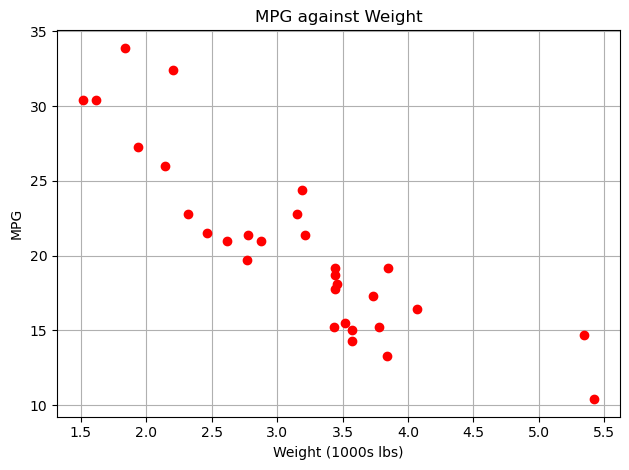

In [18]:
# method for plotting
def plot_data(df, x_col, y_col, title, x_label, y_label, line_color):
    try:
        # create scatter plot of data points
        plt.plot(df[x_col], df[y_col], 'o', color = line_color)
        plt.title(title if title else f'{y_col} vs {x_col}')
        plt.xlabel(x_label if x_label else x_col)
        plt.ylabel(y_label if y_label else y_col)

        # grid, tight layout, and show plot
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f'Error type: {type(e).__name__}')
        print(f'Error: {str(e)}')
        traceback.print_exc()

# scatter plot of MPG against Weight
plot_data(cars_df, 'wt', 'mpg', 'MPG against Weight', 'Weight (1000s lbs)', 'MPG', 'red')

### Step 3: Scatterplot of miles per gallon against horsepower
The block of code below will create a scatterplot of the variables "miles per gallon" (coded as mpg in the data set) and "horsepower" of the car (coded as hp). 

Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

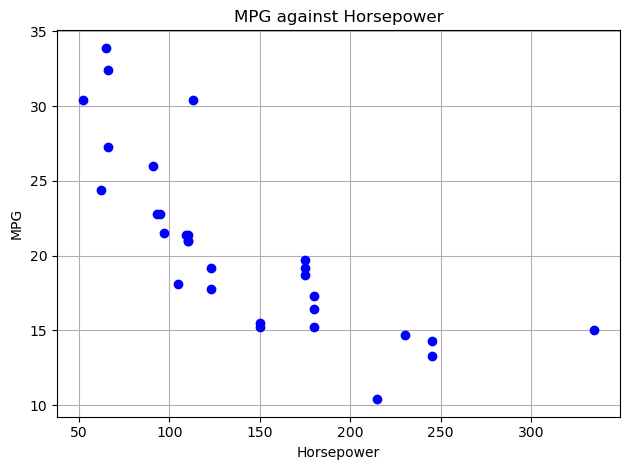

In [19]:
# scatter plot of mpg against hp
plot_data(cars_df, 'hp', 'mpg', 'MPG against Horsepower', 'Horsepower', 'MPG', 'blue')

### Step 4: Correlation matrix for miles per gallon, weight and horsepower
Now you will calculate the correlation coefficient between the variables "miles per gallon" and "weight". You will also calculate the correlation coefficient between the variables "miles per gallon" and "horsepower". The **corr** method of a dataframe returns the correlation matrix with the correlation coefficients between all variables in the dataframe. You will specify to only return the matrix for the three variables.

Click the block of code below and hit the **Run** button above. 

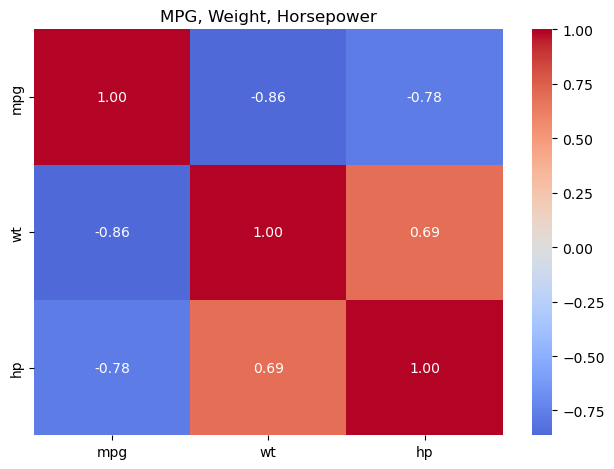

Correlation Matrix:
       mpg    wt    hp
mpg  1.00 -0.86 -0.78
wt  -0.86  1.00  0.69
hp  -0.78  0.69  1.00


In [ ]:
# method to calculate correlation for ['mpg', 'wt', 'hp']
def corr_matrix(df, col_1, col_2, col_3):
    try:
        # calculate the correlation matrix between target and 2 features
        mpg_wt_corr = df[[col_1, col_2, col_3]].corr()

        # heatmap logic
        sns.heatmap(mpg_wt_corr, annot = True, cmap ='coolwarm', fmt = '.2f', center = 0)
        plt.title(f'MPG, Weight, Horsepower')
        plt.tight_layout()
        plt.show()

        print(f'Correlation Matrix:\n {np.round(mpg_wt_corr, 2)}')

    except Exception as e:
        print(f'Error type: {type(e).__name__}')
        print(f'Error: {str(e)}')
        traceback.print_exc()

# run corr_matrix() 
corr_matrix(cars_df, 'mpg', 'wt', 'hp')

### Step 5: Multiple regression model to predict miles per gallon using weight and horsepower
This block of code produces a multiple regression model with "miles per gallon" as the response variable, and "weight" and "horsepower" as predictor variables. The **ols** method in statsmodels.formula.api submodule returns all statistics for this multiple regression model. 

Click the block of code below and hit the **Run** button above. 

In [ ]:
# create the multiple regression model with mpg as the response variable; weight and horsepower as predictor variables.
model = ols('mpg ~ wt+hp', data=cars_df).fit()

# method to summarize model using summary2() to sccess certain elements from summary() report
def summarize_reg(model):
    try:
        summary = model.summary2().tables[1] # access the coeficients table
        stats = f'''
            === Model Summary ===
            r-squared:      {model.rsquared:.4f}
            Adj. R-squared: {model.rsquared_adj:.4f}
            AIC:            {model.aic:.4f}
            BIC:            {model.bic:.4f}
            
        '''
        print(stats)
        print('=' * 32 + ' Coefficients ' + '=' * 32)
        print(summary)

    except Exception as e:
        print(f'Error type: {type(e).__name__}')
        print(f'Error: {str(e)}')
        traceback.print_exc()

# summarize_reg(model) # uncomment to run summary2()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     56.47
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           2.26e-10
Time:                        20:14:37   Log-Likelihood:                -70.594
No. Observations:                  30   AIC:                             147.2
Df Residuals:                      27   BIC:                             151.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2796      1.753     21.269      0.0

QQ-Plot of Residuals: Checks if residuals are normally distributed.
Residuals vs. Fitted: Checks for non-linearity and constant variance.
Scale-Location Plot: Checks if the spread of residuals is even (homoscedasticity).


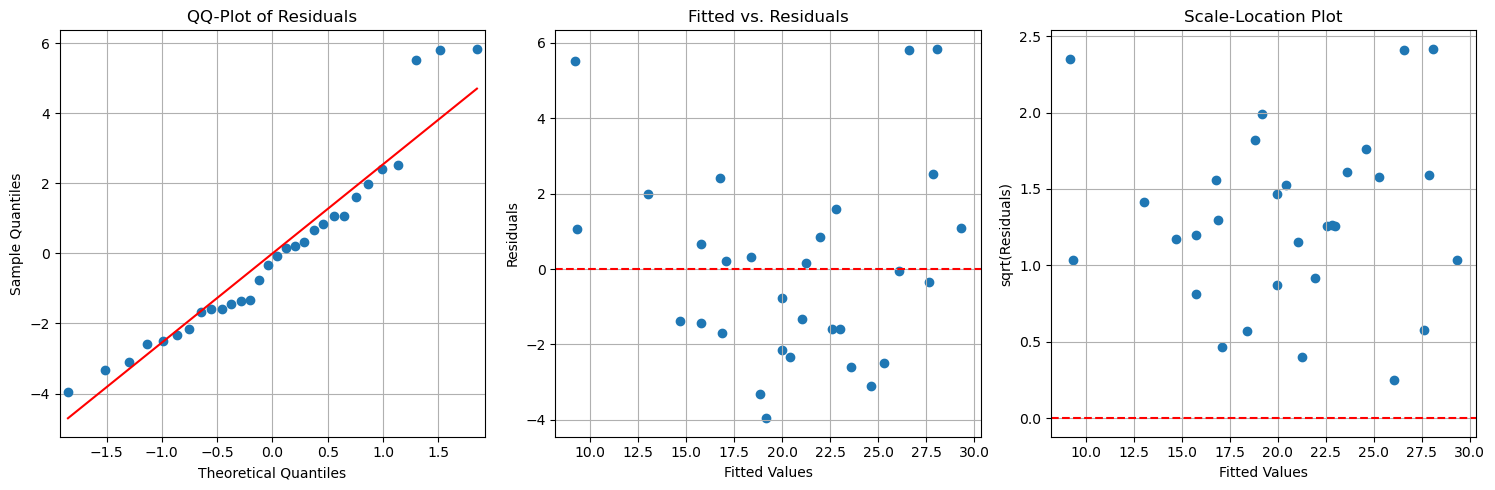

In [22]:
# method to plot metrics from model summary
def plot_reg_diagnostics(model):
    try:
        # fitted values and residuals
        fitted_vals = model.fittedvalues
        residuals = model.resid

        # create subplots
        fig, axs = plt.subplots(1, 3, figsize = (15, 5)) # 1 row, 3 columns
        
        # QQ-Plot of residuals
        print('QQ-Plot of Residuals: Checks if residuals are normally distributed.')
        qqplot(residuals, line = 's', ax = axs[0])
        axs[0].set_title('QQ-Plot of Residuals')
        axs[0].grid(True)

        # Residuals vs. Fitted
        print('Residuals vs. Fitted: Checks for non-linearity and constant variance.')
        axs[1].scatter(fitted_vals, residuals)
        axs[1].axhline(0, color = 'red', linestyle = '--')
        axs[1].set_title('Fitted vs. Residuals')
        axs[1].set_xlabel("Fitted Values")
        axs[1].set_ylabel('Residuals')
        axs[1].grid(True)


        # Scle-Location Plot
        print('Scale-Location Plot: Checks if the spread of residuals is even (homoscedasticity).')
        axs[2].scatter(fitted_vals, np.sqrt(np.abs(residuals)))
        axs[2].axhline(0, color = 'red', linestyle = '--')
        axs[2].set_title("Scale-Location Plot")
        axs[2].set_xlabel('Fitted Values')
        axs[2].set_ylabel('sqrt(Residuals)')
        axs[2].grid(True)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f'Error type: {type(e).__name__}')
        print(f'Error: {str(e)}')
        traceback.print_exc()

# run method to plot 
plot_reg_diagnostics(model)


## End of initial post
Attach the HTML output to your initial post in the Module Six discussion. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all questions about this activity in the Module Six discussion.

## Follow-up posts (due Sunday)
Return to the Module Six discussion to answer the follow-up questions in your response posts to other students. There are no Python scripts to run for your follow-up posts.